# Create project

## Import

In [1]:
%matplotlib inline

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyiron import Project, Atoms
from scipy.optimize import minimize

In [3]:
import warnings  # ignore Lammps warnings 
warnings.filterwarnings("ignore")

## Clean up

In [4]:
pr = Project('fitting')
pr.remove_jobs(recursive=True)

This group does not exist in the HDF5 file lj_fitting
This group does not exist in the HDF5 file lj_validation
This group does not exist in the HDF5 file murn


In [5]:
pr = Project('import')
pr.remove_jobs(recursive=True)

This group does not exist in the HDF5 file strain_0_98
This group does not exist in the HDF5 file strain_0_94
This group does not exist in the HDF5 file strain_1_0
This group does not exist in the HDF5 file strain_0_92
This group does not exist in the HDF5 file strain_0_9
This group does not exist in the HDF5 file strain_1_1
This group does not exist in the HDF5 file strain_1_06
This group does not exist in the HDF5 file strain_1_08
This group does not exist in the HDF5 file strain_1_04
This group does not exist in the HDF5 file strain_0_96
This group does not exist in the HDF5 file strain_1_02


In [6]:
pr = Project('dft')
pr.remove_jobs(recursive=True)

# Get fitting data 

## Create VASP calculation 

### Setup VASP

In [7]:
job_vasp = pr.create_job(job_type=pr.job_type.Vasp, job_name='vasp')

In [8]:
job_vasp.structure = pr.create_ase_bulk('Al')

In [9]:
job_vasp.input.incar

,Parameter,Value,Comment
0,SYSTEM,vasp,jobname
1,PREC,Accurate,
2,ALGO,Fast,
3,ENCUT,250,
4,LREAL,False,
5,LWAVE,False,
6,LORBIT,0,


In [10]:
job_vasp.input.kpoints

,Parameter,Value,Comment
0,,Kpoints file generated with pyiron,
1,,0,
2,,Monkhorst_Pack,
3,,4 4 4,
4,,0 0 0,


### Calculate Murnaghan 

In [11]:
murn = job_vasp.create_job(job_type=pr.job_type.Murnaghan, job_name='murn')

In [12]:
murn.run()

The job murn was saved and received the ID: 2398
The job strain_0_9 was saved and received the ID: 2399
The job strain_0_92 was saved and received the ID: 2400
The job strain_0_94 was saved and received the ID: 2401
The job strain_0_96 was saved and received the ID: 2402
The job strain_0_98 was saved and received the ID: 2403
The job strain_1_0 was saved and received the ID: 2404
The job strain_1_02 was saved and received the ID: 2405
The job strain_1_04 was saved and received the ID: 2406
The job strain_1_06 was saved and received the ID: 2407
The job strain_1_08 was saved and received the ID: 2408
The job strain_1_1 was saved and received the ID: 2409
job_id:  2399 finished
job_id:  2400 finished
job_id:  2401 finished
job_id:  2402 finished
job_id:  2403 finished
job_id:  2404 finished
job_id:  2405 finished
job_id:  2406 finished
job_id:  2407 finished
job_id:  2408 finished
job_id:  2409 finished


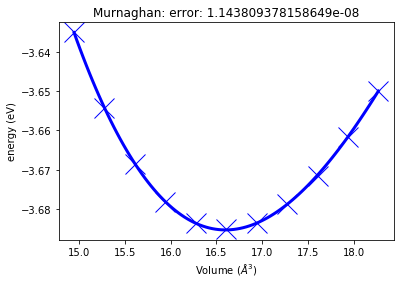

In [13]:
murn.plot()

### Overview 

In [14]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,2398,finished,Al,murn,/murn,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/,2019-03-19 12:34:21.453839,2019-03-19 12:34:39.558371,18.0,pyiron@MacBook-Pro.local#1#11/11,Murnaghan,0.3.0,None,NaN
1,2399,finished,Al,strain_0_9,/strain_0_9,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:22.341560,2019-03-19 12:34:23.031180,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
2,2400,finished,Al,strain_0_92,/strain_0_92,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:23.876368,2019-03-19 12:34:24.663445,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
3,2401,finished,Al,strain_0_94,/strain_0_94,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:25.642945,2019-03-19 12:34:26.326081,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
4,2402,finished,Al,strain_0_96,/strain_0_96,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:27.130176,2019-03-19 12:34:27.968296,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
5,2403,finished,Al,strain_0_98,/strain_0_98,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:28.774276,2019-03-19 12:34:29.556422,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
6,2404,finished,Al,strain_1_0,/strain_1_0,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:30.357031,2019-03-19 12:34:31.144887,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
7,2405,finished,Al,strain_1_02,/strain_1_02,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:31.947362,2019-03-19 12:34:32.726684,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
8,2406,finished,Al,strain_1_04,/strain_1_04,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:33.531379,2019-03-19 12:34:34.327368,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0
9,2407,finished,Al,strain_1_06,/strain_1_06,/Users/jan/PyIron_data/projects/,2019-03-19-potential-fitting/dft/murn_hdf5/,2019-03-19 12:34:35.153611,2019-03-19 12:34:35.999023,0.0,pyiron@MacBook-Pro.local#1,Vasp,5.4,None,2398.0


## Or Import VASP calculation 

In [15]:
for job in pr.iter_jobs():
    job.decompress()

In [16]:
pr_import = Project('import')

In [17]:
pr_import.import_from_path(path='dft', recursive=True)

strain_0_98 strain_0_98
job was stored with the job ID  2410
strain_0_94 strain_0_94
job was stored with the job ID  2411
strain_1_0 strain_1_0
job was stored with the job ID  2412
strain_0_92 strain_0_92
job was stored with the job ID  2413
strain_0_9 strain_0_9
job was stored with the job ID  2414
strain_1_1 strain_1_1
job was stored with the job ID  2415
strain_1_06 strain_1_06
job was stored with the job ID  2416
strain_1_08 strain_1_08
job was stored with the job ID  2417
strain_1_04 strain_1_04
job was stored with the job ID  2418
strain_0_96 strain_0_96
job was stored with the job ID  2419
strain_1_02 strain_1_02
job was stored with the job ID  2420


# Fit potential 

## Collect VASP calculation 

### Setup pyiron table

In [18]:
pr_fit = Project('fitting')

In [19]:
pyiron_table = pr_fit.create_job(job_type=pr_fit.job_type.TableJob, job_name='analysis')

In [20]:
pyiron_table.analysis_project = pr_import
# pyiron_table.analysis_project = pr

In [21]:
pyiron_table.add.get_structure
pyiron_table.add.get_energy_tot
pyiron_table.add.get_forces
pyiron_table.add.get_job_name

True

In [22]:
pyiron_table.filter_function = pyiron_table.filter.job_type(pr.job_type.Vasp)

In [23]:
pyiron_table.run()

The job analysis was saved and received the ID: 2421


### Summary

In [24]:
df_fit = pyiron_table.get_dataframe().sort_values(by='job_name')
df_fit

,energy_tot,forces,job_name,structure
4,-3.635028,"[[0.0, -0.0, -0.0]]",strain_0_9,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.955116, 1.955116], [1.955116, 0.0, 1.955116], [1.955116, 1.955116, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
3,-3.654296,"[[0.0, 0.0, 0.0]]",strain_0_92,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.969492, 1.969492], [1.969492, 0.0, 1.969492], [1.969492, 1.969492, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
1,-3.668492,"[[0.0, 0.0, 0.0]]",strain_0_94,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.983662, 1.983662], [1.983662, 0.0, 1.983662], [1.983662, 1.983662, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
9,-3.678213,"[[-0.0, -0.0, -0.0]]",strain_0_96,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.997632, 1.997632], [1.997632, 0.0, 1.997632], [1.997632, 1.997632, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
0,-3.683442,"[[0.0, 0.0, 0.0]]",strain_0_98,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.011409, 2.011409], [2.011409, 0.0, 2.011409], [2.011409, 2.011409, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
2,-3.685158,"[[0.0, 0.0, -0.0]]",strain_1_0,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0], [0.0]], ""magmoms""..."
10,-3.683596,"[[0.0, 0.0, 0.0]]",strain_1_02,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.038411, 2.038411], [2.038411, 0.0, 2.038411], [2.038411, 2.038411, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
8,-3.678632,"[[0.0, 0.0, 0.0]]",strain_1_04,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.051648, 2.051648], [2.051648, 0.0, 2.051648], [2.051648, 2.051648, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
6,-3.671488,"[[0.0, 0.0, 0.0]]",strain_1_06,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.064716, 2.064716], [2.064716, 0.0, 2.064716], [2.064716, 2.064716, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."
7,-3.661704,"[[0.0, 0.0, 0.0]]",strain_1_08,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.077621, 2.077621], [2.077621, 0.0, 2.077621], [2.077621, 2.077621, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],..."


## Fit lennard jones potential 

### Define Fit functions 

In [25]:
def set_structure_run_and_get_energy_and_forces(job, structure): 
    job.structure = structure 
    job.run()
    return job.output.energy_tot[-1], job.output.forces[-1] 

In [26]:
def get_potential(eps, sigma, cutoff=10.0):
    return pd.DataFrame({'Name': ['Al3ScLennardJones'],
                         'Filename': [[]],                             
                         'Model'   : ['LJ'], 
                         'Species' : [['Al']], 
                         'Config'  : [['pair_style lj/cut %f \n'%cutoff, 
                                       'pair_coeff 1 1 %.16f %.16f \n'%(eps, sigma)]]})

In [27]:
def compute_lj(job_lj, structure_lst, energy_lst, forces_lst, eps, sigma, cutoff=10.0, force_weight=0.1):
    method_dict['eps'].append(eps)
    method_dict['sigma'].append(sigma)
    job_lj.potential = get_potential(eps, sigma, cutoff)
    lj_energy_lst, lj_force_lst = zip(*[set_structure_run_and_get_energy_and_forces(job_lj, structure) for structure in structure_lst])
    total_loss = (np.linalg.norm(np.array(energy_lst) - np.array(lj_energy_lst))) + force_weight*np.linalg.norm(np.array(forces_lst) - np.array(lj_force_lst))
    method_dict['loss'].append(total_loss)
    return total_loss

In [28]:
def loss(initial_params): 
    eps, sigma = initial_params
    return compute_lj(job_lj=job_lj, 
                      structure_lst=structure_lst, 
                      energy_lst=energy_tot,
                      eps=eps, 
                      sigma=sigma, 
                      forces_lst=forces) 

### Datastructure 

In [29]:
method_dict = {'eps': [], 'sigma': [], 'loss': []}

In [30]:
energy_tot = df_fit.energy_tot.values
# energy_tot -= np.min(energy_tot)  # normalise to the equlibrium energy 
structure_lst = [Atoms(**json.loads(s)) for s in df_fit.structure.values]
forces = np.array([json.loads(f) for f in df_fit.forces.values])

### Run fitting 

In [31]:
job_lj = pr_fit.create_job(job_name='lj_fitting', job_type=pr_fit.job_type.Lammps)
job_lj.server.run_mode.interactive = True
job_lj.interactive_enforce_structure_reset = True

In [32]:
res = minimize(loss, [0.5, 2.5], method='Nelder-Mead')
res

The job lj_fitting was saved and received the ID: 2422


 final_simplex: (array([[0.44154765, 2.61407788],
       [0.44154397, 2.61399567],
       [0.44152627, 2.61400514]]), array([0.11945216, 0.1194532 , 0.11945385]))
           fun: 0.11945215981707664
       message: 'Optimization terminated successfully.'
          nfev: 56
           nit: 28
        status: 0
       success: True
             x: array([0.44154765, 2.61407788])

In [33]:
res.success

True

In [34]:
eps_final, sigma_final = res.x 

In [35]:
job_lj.interactive_close()

### Plots 

Text(0.5, 0, 'iteration')

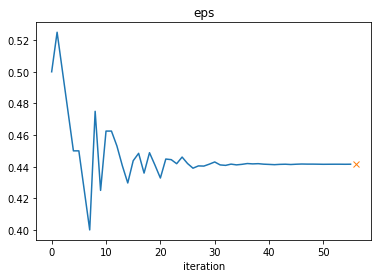

In [36]:
plt.plot(method_dict['eps'])
plt.plot([len(method_dict['eps'])], [eps_final], 'x')
plt.title('eps')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

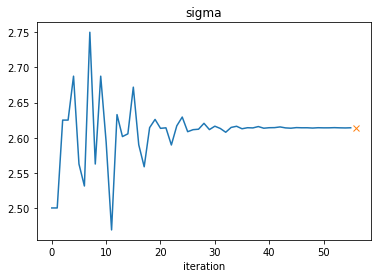

In [37]:
plt.plot(method_dict['sigma'])
plt.plot([len(method_dict['sigma'])], [sigma_final], 'x')
plt.title('sigma')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

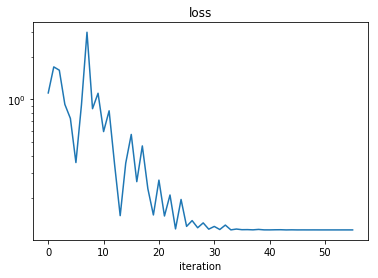

In [38]:
plt.plot(method_dict['loss'])
plt.title('loss')
plt.yscale('log')
plt.xlabel('iteration')

### Validation 

In [39]:
job_lj = pr_fit.create_job(job_name='lj_validation', job_type=pr_fit.job_type.Lammps)
job_lj.server.run_mode.interactive = True
job_lj.interactive_enforce_structure_reset = True

In [40]:
job_lj.potential = get_potential(eps=eps_final, sigma=sigma_final, cutoff=10.0)

In [41]:
job_lj.structure = structure_lst[len(structure_lst)//2]

In [42]:
murn = job_lj.create_job(job_type=pr_fit.job_type.Murnaghan, job_name='murn')

In [43]:
murn.run()

The job murn was saved and received the ID: 2423
The job lj_validation was saved and received the ID: 2424


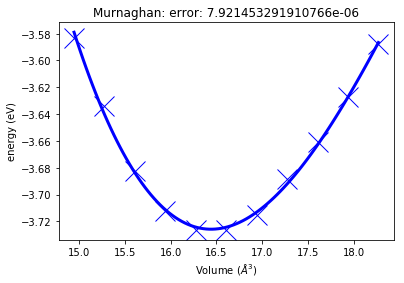

In [44]:
murn.plot()

# Debugging 

In [45]:
murn['output/energy']

array([-3.58292728, -3.63394375, -3.6827582 , -3.71242633, -3.72607444,
       -3.7263373 , -3.71543946, -3.68870451, -3.66108574, -3.62711768,
       -3.58794757])

In [46]:
energy_tot

array([-3.63502768, -3.65429628, -3.66849226, -3.67821311, -3.68344159,
       -3.68515838, -3.68359552, -3.67863192, -3.67148812, -3.66170397,
       -3.64985766])

In [47]:
np.isclose(np.array([s.get_volume() for s in structure_lst]), murn['output/volume'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [48]:
structure_lst

[Al: [0. 0. 0.]
 tags: 
     spin: [(0: nan)]
 pbc: [ True  True  True]
 cell: 
 [[0.       1.955116 1.955116]
  [1.955116 0.       1.955116]
  [1.955116 1.955116 0.      ]], Al: [0. 0. 0.]
 tags: 
     spin: [(0: nan)]
 pbc: [ True  True  True]
 cell: 
 [[0.       1.969492 1.969492]
  [1.969492 0.       1.969492]
  [1.969492 1.969492 0.      ]], Al: [0. 0. 0.]
 tags: 
     spin: [(0: nan)]
 pbc: [ True  True  True]
 cell: 
 [[0.       1.983662 1.983662]
  [1.983662 0.       1.983662]
  [1.983662 1.983662 0.      ]], Al: [0. 0. 0.]
 tags: 
     spin: [(0: nan)]
 pbc: [ True  True  True]
 cell: 
 [[0.       1.997632 1.997632]
  [1.997632 0.       1.997632]
  [1.997632 1.997632 0.      ]], Al: [0. 0. 0.]
 tags: 
     spin: [(0: nan)]
 pbc: [ True  True  True]
 cell: 
 [[0.       2.011409 2.011409]
  [2.011409 0.       2.011409]
  [2.011409 2.011409 0.      ]], Al: [0. 0. 0.]
 tags: 
     spin: [(0: nan)]
 pbc: [ True  True  True]
 cell: 
 [[0.    2.025 2.025]
  [2.025 0.    2.025]
  [2.0

In [49]:
forces

array([[[ 0., -0., -0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[-0., -0., -0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0., -0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[-0.,  0., -0.]]])

In [50]:
method_dict

{'eps': [0.5,
  0.525,
  0.5,
  0.475,
  0.44999999999999996,
  0.44999999999999996,
  0.4249999999999998,
  0.3999999999999999,
  0.475,
  0.42499999999999993,
  0.46249999999999997,
  0.4624999999999999,
  0.45312499999999994,
  0.440625,
  0.4296874999999999,
  0.44375,
  0.44843749999999993,
  0.4359374999999999,
  0.4488281249999999,
  0.441015625,
  0.43281250000000004,
  0.44482421874999994,
  0.4444335937499999,
  0.4418701171875,
  0.4460693359374999,
  0.441986083984375,
  0.4390319824218751,
  0.4404800415039063,
  0.4403640747070313,
  0.4415805816650391,
  0.44297065734863283,
  0.44110269546508796,
  0.44081315994262704,
  0.4416058778762818,
  0.44112799167633066,
  0.441467434167862,
  0.4419706165790559,
  0.4417536363005639,
  0.4418920800089838,
  0.44157359562814247,
  0.44142583720386036,
  0.4412619376555086,
  0.44145811945199964,
  0.44154472658410676,
  0.4413646859116853,
  0.44154557988513266,
  0.4416644692653791,
  0.4416048112499994,
  0.44160395794897345,